## Analyzing heating events at Artisan's Asylum

At Artisan's asylum, we'd been monitoring CO2 levels for a few weeks; data is here: [http://co2dataviz.pvos.org/data/brj93kvnkf6b/](http://co2dataviz.pvos.org/data/brj93kvnkf6b/)

We'd noticed particularly high CO2 levels.  A series of heating system failures led us to realize that the main source of the CO2 we were seeing was the heating system.  

![](img/heater_events.jpeg)

Based on the ventilation analysis suggested in [this twitter thread](https://twitter.com/Poppendieck/status/1366055149983076354), we attempt below to model several of these heating-system-failure events (labeled "A", "B", "C" above) with exponentials, in order to assess the time constant for the decay of CO2 over time. 

![](img/twitter_fit.png)

Some notes on the suggestions in the thread above:
- Avoid using the first 5 minutes after the initial decay onset
- Avoid using values below 600 ppm
- Assessing the time constant in units of hours results in a standardized measure of ventilation, the "air change per hour" (ACH).

![](img/ach_guidance.png)


## Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np

In [88]:
feed_a_pubkey = "jdwktcu9xt5c" # wood shop
feed_b_pubkey = "b2srm27dragm" # front desk

# code below will plot the 'distance_meters' parameter from both of those feeds on the same chart
base_url = "http://co2data.pvos.org/data/"
feed_a_data = pd.read_csv(base_url+feed_a_pubkey+"/csv/")
feed_b_data = pd.read_csv(base_url+feed_b_pubkey+"/csv/")

x1=feed_a_data['created']
y1=feed_a_data['co2']

x2=feed_b_data['created']
y2=feed_b_data['co2']


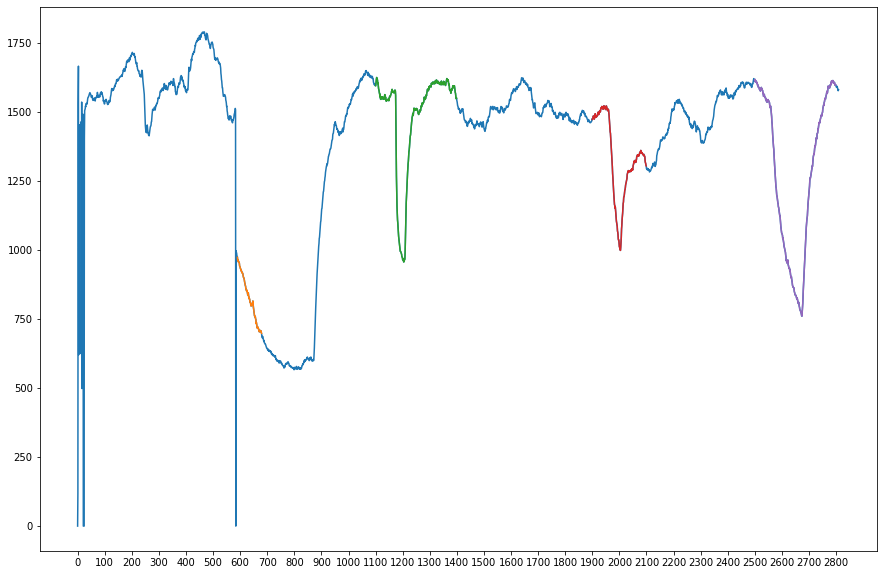

In [5]:
plt.figure(figsize=(15, 10))
plt.plot(y1)
plt.xticks(np.arange(0,len(y1),100))

event_a = y1[590:680]
plt.plot(event_a)

event_b = y1[1100:1400]
plt.plot(event_b)

event_c = y1[1900:2100]
plt.plot(event_c)

event_d = y1[2500:2800]
plt.plot(event_d)
plt.show()


# Event A

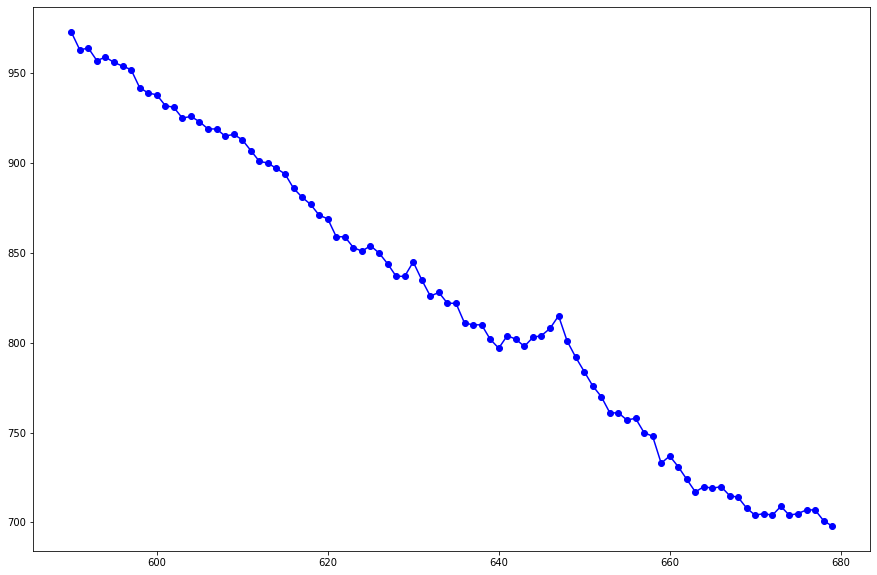

In [4]:
event=y1[590:680]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-bo')
plt.show()

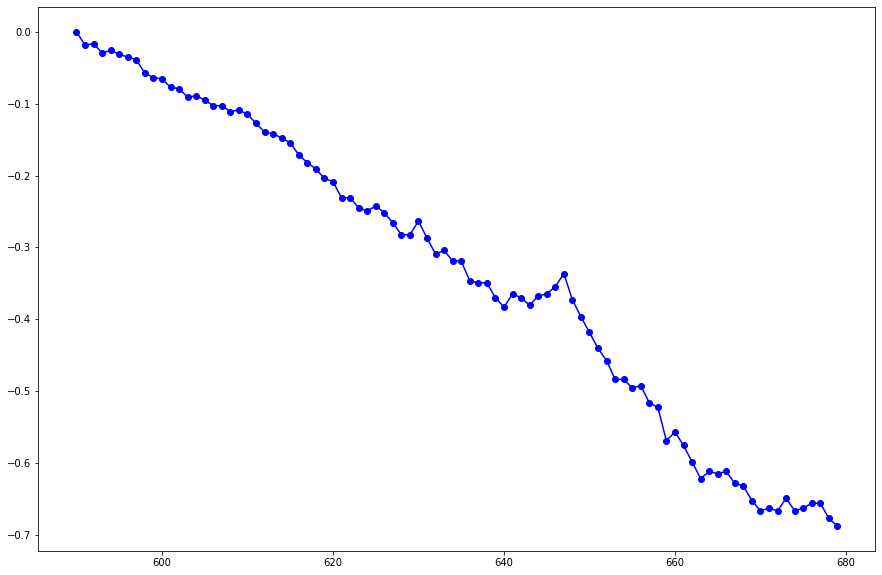

In [157]:
xmin = 590
xmax = 680
co2_outside=420
amplitude=y1[xmin]-co2_outside
event = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [158]:
slope=-.37/((xmax-xmin)*5/60)
slope
slope2=-.35/((680-640)*5/60)
slope2

-0.10499999999999998

# Event B

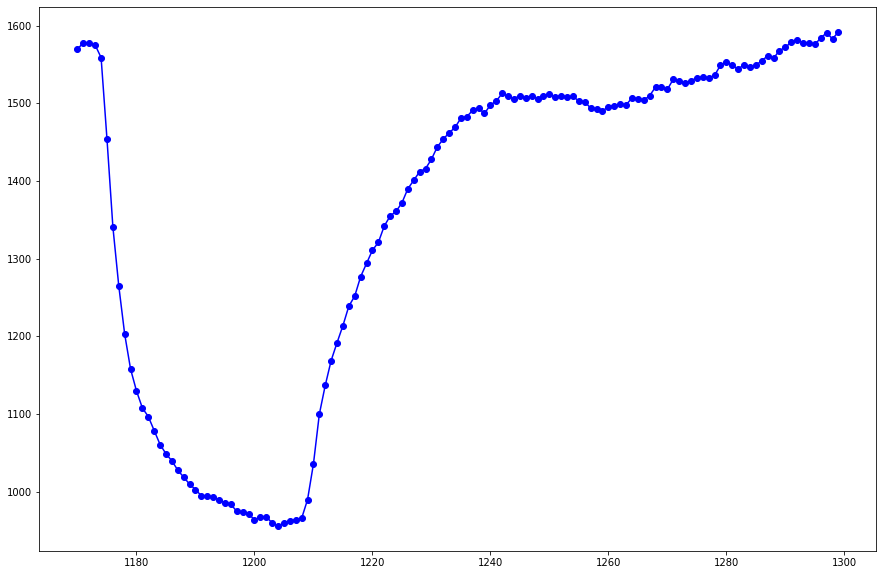

In [59]:
event_b = y1[1170:1300]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_b,'-bo')
plt.show()

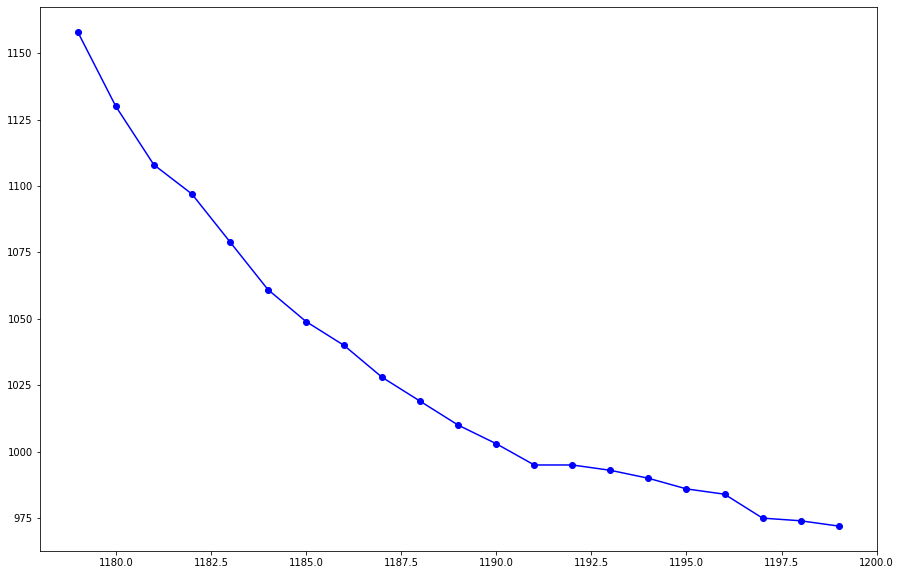

In [96]:
event_b = y1[1179:1200]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_b,'-bo')
plt.show()

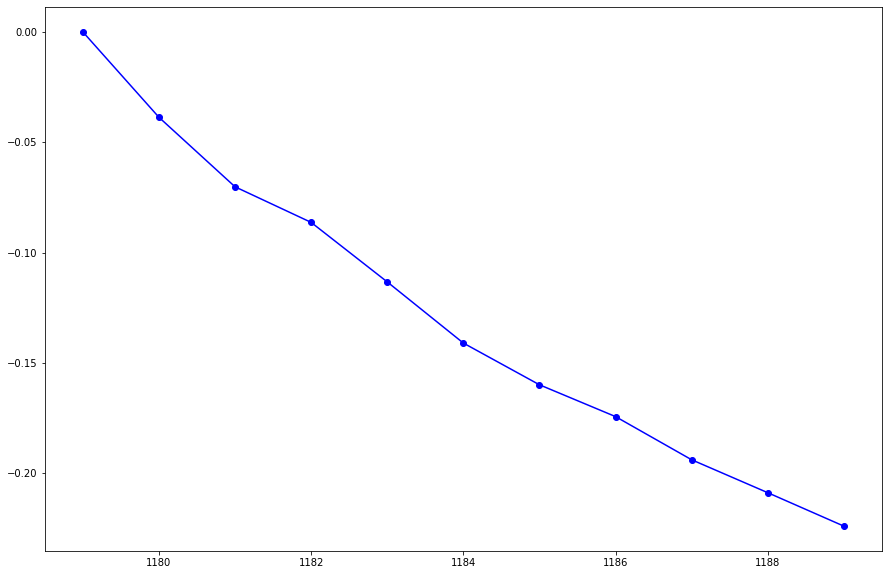

In [137]:
xmin = 1179
xmax = 1190
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_b = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_b,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [141]:
slope=-.22/((1188-1180)*5/60)
slope

-0.33

# Event C

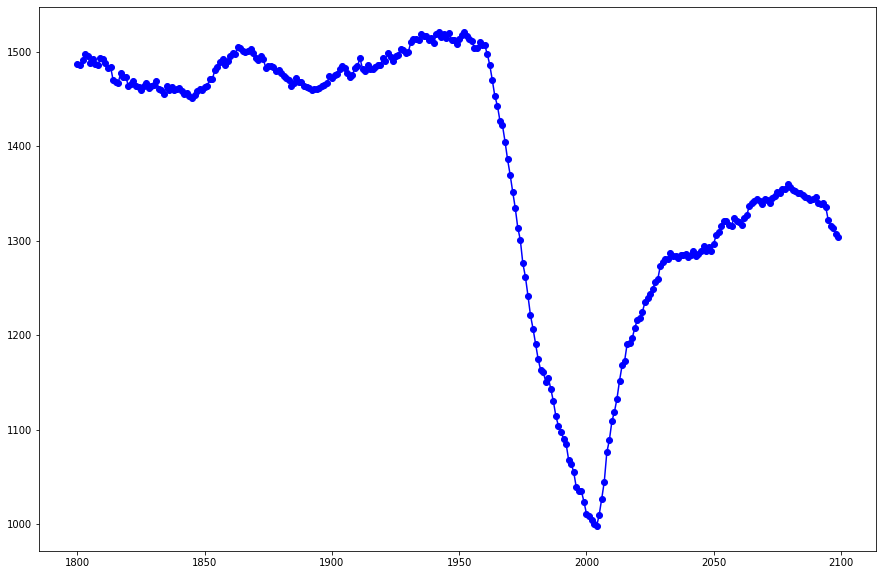

In [143]:
event_c = y1[1800:2100]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_c,'-bo')
plt.show()

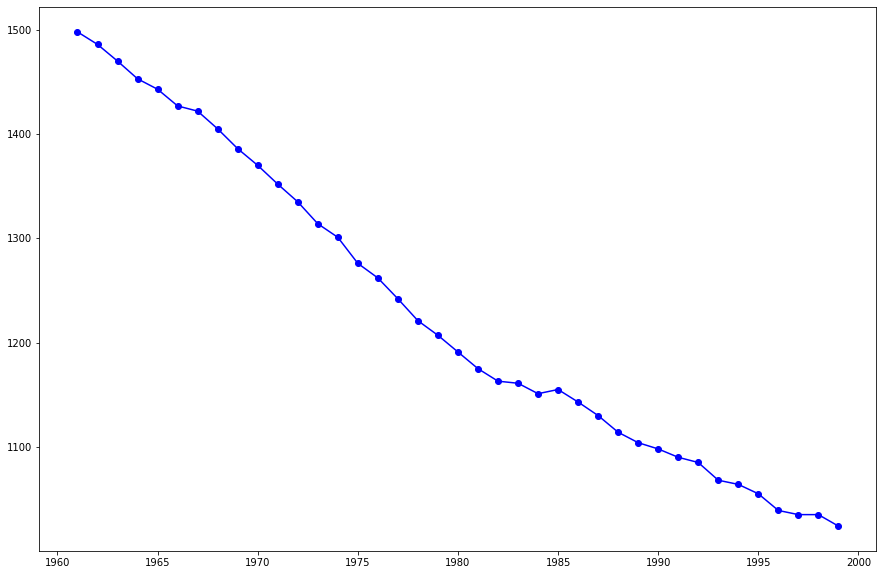

In [145]:
event_c = y1[1961:2000]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_c,'-bo')
plt.show()

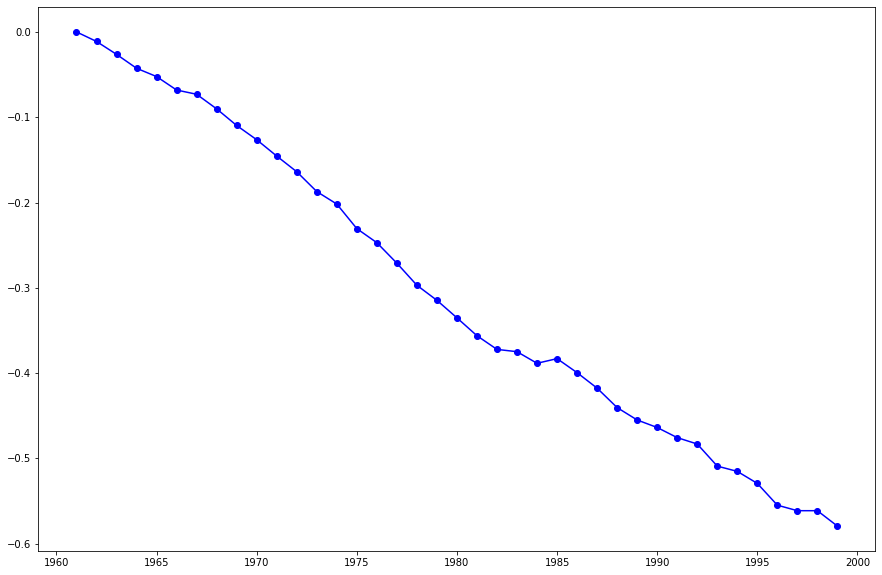

In [146]:
xmin = 1961
xmax = 2000
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_c = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_c,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [147]:
slope=-.6/((2000-1961)*5/60)
slope

-0.1846153846153846

## Addendum March 4

A new, very clean heating event just occurred yesterday:

![](img/heating_event_mar_03.png)

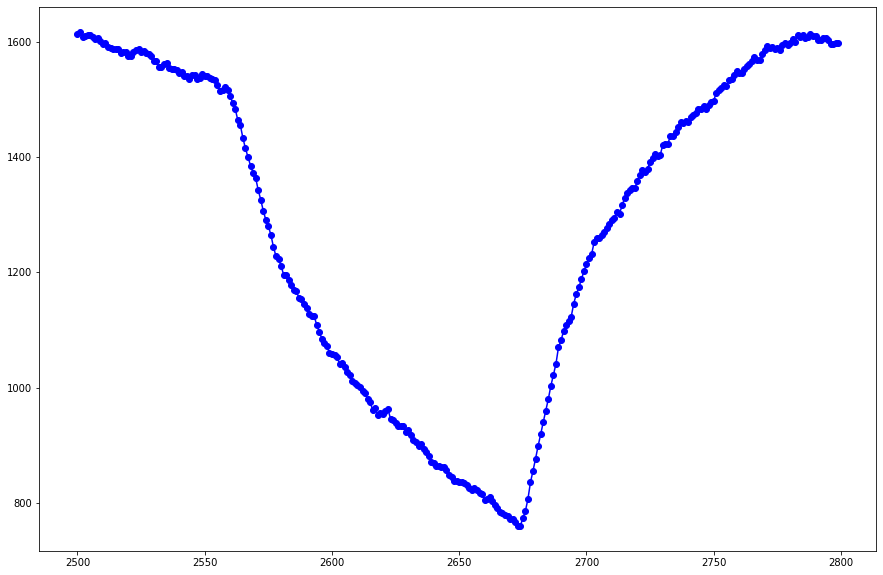

In [65]:
event=y1[2500:2800]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-bo')
plt.show()

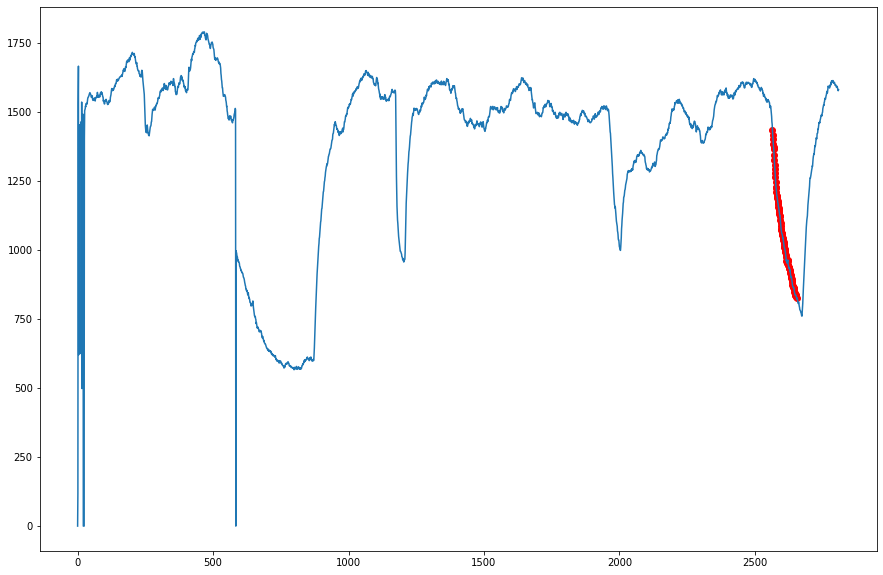

In [66]:
event=y1[2565:2655]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-ro')
plt.plot(y1)
plt.show()

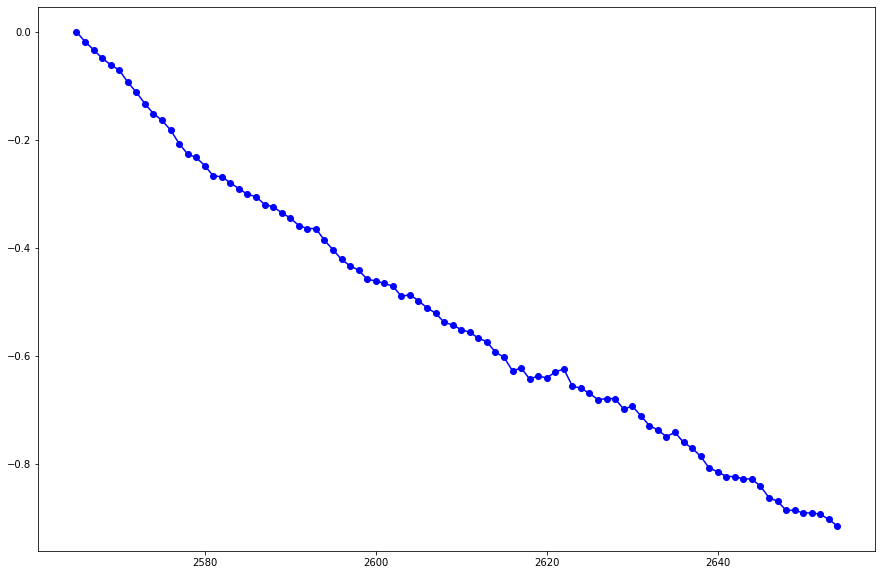

In [68]:
xmin = 2565
xmax = 2655
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_slope = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_slope,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [69]:
slope=-1.0/((xmax-xmin)*5/60)
slope

-0.13333333333333333

In [70]:
y1[xmin:xmax]

2565    1433
2566    1415
2567    1400
2568    1385
2569    1373
        ... 
2650     836
2651     836
2652     835
2653     831
2654     826
Name: co2, Length: 90, dtype: int64

In [71]:
xvals=feed_a_data.index.to_numpy()

In [128]:
yvals=feed_a_data['co2'].to_numpy()

In [73]:
x=xvals[xmin:xmax]
y=yvals[xmin:xmax]

In [74]:
x

array([2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575,
       2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586,
       2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597,
       2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608,
       2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619,
       2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630,
       2631, 2632, 2633, 2634, 2635, 2636, 2637, 2638, 2639, 2640, 2641,
       2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652,
       2653, 2654])

In [75]:
y

array([1433, 1415, 1400, 1385, 1373, 1364, 1343, 1326, 1307, 1291, 1280,
       1265, 1244, 1228, 1223, 1211, 1196, 1195, 1186, 1178, 1170, 1167,
       1156, 1153, 1145, 1138, 1128, 1124, 1124, 1109, 1097, 1085, 1077,
       1072, 1061, 1059, 1056, 1053, 1041, 1043, 1036, 1028, 1022, 1012,
       1009, 1004, 1001,  995,  991,  980,  975,  961,  964,  953,  956,
        954,  960,  963,  946,  944,  939,  933,  934,  934,  924,  927,
        918,  909,  905,  899,  903,  894,  889,  882,  872,  869,  865,
        865,  863,  863,  857,  848,  845,  838,  838,  836,  836,  835,
        831,  826])

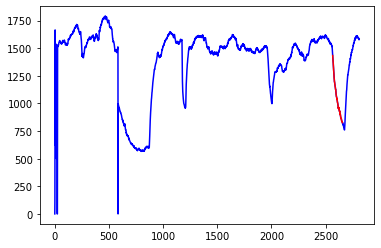

In [80]:
plt.plot(y1,'b')
plt.plot(x,y,'r')
plt.show()

In [86]:
co2_outside=420
amplitude=y[0]-co2_outside
x=(x-x[0])*(5/60) # convert to hours
y_prime = np.log((y-co2_outside)/amplitude)



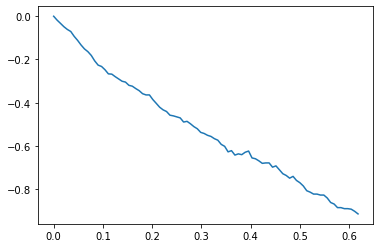

In [87]:
plt.plot(x,y_prime)

In [83]:
p = np.polyfit(x, y_prime, 1)

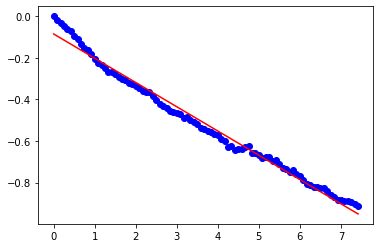

In [84]:
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [85]:
tau=-1/p[1]
tau

11.724939522424831

In [89]:
x1

0       2021-02-17T20:26:45.607Z
1       2021-02-17T20:29:17.224Z
2       2021-02-17T20:29:53.503Z
3       2021-02-17T20:32:16.374Z
4       2021-02-20T19:59:40.753Z
                  ...           
2805    2021-03-04T13:36:43.144Z
2806    2021-03-04T13:41:43.732Z
2807    2021-03-04T13:46:44.310Z
2808    2021-03-04T13:51:44.948Z
2809    2021-03-04T13:56:45.596Z
Name: created, Length: 2810, dtype: object

In [109]:
t=pd.to_datetime(feed_a_data['created'])
t

0      2021-02-17 20:26:45.607000+00:00
1      2021-02-17 20:29:17.224000+00:00
2      2021-02-17 20:29:53.503000+00:00
3      2021-02-17 20:32:16.374000+00:00
4      2021-02-20 19:59:40.753000+00:00
                     ...               
2805   2021-03-04 13:36:43.144000+00:00
2806   2021-03-04 13:41:43.732000+00:00
2807   2021-03-04 13:46:44.310000+00:00
2808   2021-03-04 13:51:44.948000+00:00
2809   2021-03-04 13:56:45.596000+00:00
Name: created, Length: 2810, dtype: datetime64[ns, UTC]

In [116]:
timestamp_seconds=t.astype(int)/10**9

In [117]:
timestamp_hours=timestamp_seconds/(3600)

In [118]:
timestamp_hours

0       448220.446002
1       448220.488118
2       448220.498195
3       448220.537882
4       448291.994654
            ...      
2805    448573.611984
2806    448573.695481
2807    448573.778975
2808    448573.862486
2809    448573.945999
Name: created, Length: 2810, dtype: float64

In [123]:
x_hours=timestamp_hours.to_numpy()

In [127]:
x_shifted=x_hours-x_hours[0]

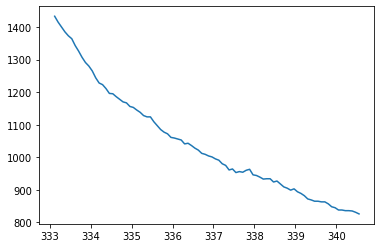

In [131]:
x=x_shifted[xmin:xmax]
y=yvals[xmin:xmax]
plt.plot(x,y)

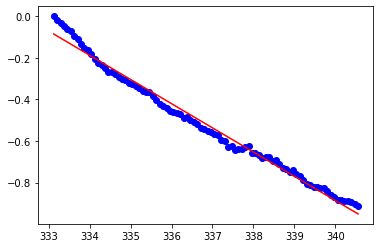

In [132]:
co2_outside=420
amplitude=y[0]-co2_outside
y_prime = np.log((y-co2_outside)/amplitude)

p = np.polyfit(x, y_prime, 1)
f = np.poly1d(p)
fig=plt.figure()
ax=fig.add_subplot(111)
plt.plot(x,y_prime,'bo',label="Data")
plt.plot(x,f(x), 'r-',label="Polyfit")
plt.show()

In [133]:
p

array([-0.11642584, 38.69878726])

In [134]:
tau=-1/p[0]

In [135]:
tau

8.589158518782517